In [0]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan  6 20:37:47 2020

@author: Suchit
"""
from skimage import transform, measure
import nibabel as nib
import pylab as plt
import numpy as np
import math
import cv2

In [0]:
def get_img():
    img1 = nib.load('100206_3T_T1w_MPR1.nii.gz')
    img = img1.get_fdata()
    img /= img.max()
    img *= 255
    print("shape: " + str(np.shape(img)))
    return img

In [0]:
def fft_lr(img, factor):
    x = int(img.shape[1]//(factor*2))
    print(x)
    imgfft = np.fft.fftn(img)
    imgfft = np.fft.fftshift(imgfft)
    y_center = imgfft.shape[1] // 2
    z_center = imgfft.shape[2] // 2
    imgfft = imgfft[:, y_center-x : y_center+x, z_center-x : z_center+x]
    imgifft = np.fft.ifftn(imgfft)
    lr_img = abs(imgifft)

    #resizing the lr scan to the size of hr scan
    lr_img = transform.resize(lr_img, img.shape)
    lr_img /= lr_img.max()
    lr_img *= 255
    return lr_img

In [0]:
img = get_img()
lr_img = fft_lr(img, 3)

slice_lr = lr_img[114, :, :]
slice_hr = img[114, :, :]

shape: (256, 320, 320)
53


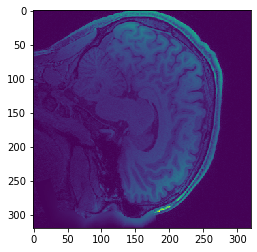

In [0]:
plt.imshow(slice_hr)

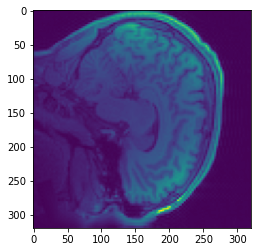

In [0]:
plt.imshow(slice_lr)